In [17]:
!pip install easyocr imutils -q

In [125]:
import numpy as np
import cv2
import easyocr
import cv2
from matplotlib import pyplot as plt
import imutils
import pandas as pd
from google.colab.patches import cv2_imshow

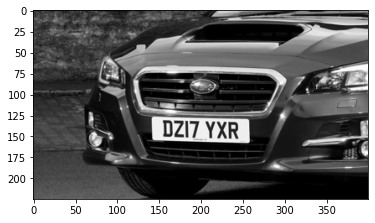

In [196]:
img = cv2.imread('/content/Cars3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

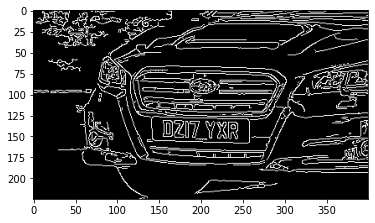

In [197]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [198]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [199]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

In [208]:
location

array([[[141, 129]],

       [[145, 155]],

       [[258, 157]],

       [[256, 129]]], dtype=int32)

In [207]:
min(location[0][0])

129

In [201]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

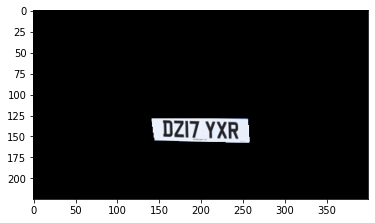

In [202]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [203]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

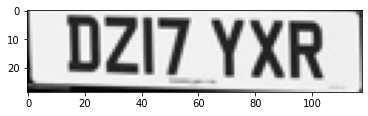

In [204]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## OCR

In [205]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[10, 0], [110, 0], [110, 29], [10, 29]], 'DZIZ YXR', 0.8210947053963106)]

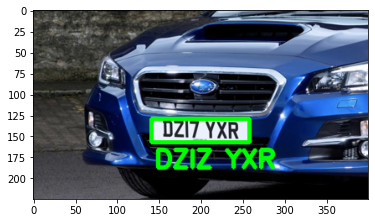

In [206]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[1][0][0], approx[2][0][1]+30), fontFace=font, fontScale=0.6, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


## Script

In [234]:
# script para pegar as imagens de um folder para usar no "for" debaixo

from PIL import Image
import os, os.path

imgs = []
path = "/content/plates"
valid_images = [".jpg",".png"]
for f in os.listdir(path):
    ext = os.path.splitext(f)[1]
    if ext.lower() not in valid_images:
        continue
    imgs.append(Image.open(os.path.join(path,f)))

print(imgs)

[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=590x350 at 0x7F160F63B550>, <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=400x248 at 0x7F160F643C50>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x375 at 0x7F160F643410>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=500x268 at 0x7F160F643350>]


In [236]:
for image in imgs:
  img = cv2.imread(image)
  gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

TypeError: ignored

In [222]:
dataset_length = 7
def plate_detection():
  df_lista = []
  for i in range(dataset_length):
    img = cv2.imread(f'/content/Cars{i}.png')
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

    bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
    edged = cv2.Canny(bfilter, 30, 200) #Edge detection
    plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

    keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    contours = imutils.grab_contours(keypoints)
    contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]
    
    location = None
    for contour in contours:
        approx = cv2.approxPolyDP(contour, 10, True)
        if len(approx) == 4:
            location = approx
            break
    mask = np.zeros(gray.shape, np.uint8)
    new_image = cv2.drawContours(mask, [location], 0,255, -1)
    new_image = cv2.bitwise_and(img, img, mask=mask)

    (x,y) = np.where(mask==255)
    (x1, y1) = (np.min(x), np.min(y))
    (x2, y2) = (np.max(x), np.max(y))
    cropped_image = gray[x1:x2+1, y1:y2+1]

    reader = easyocr.Reader(['en'])
    result = reader.readtext(cropped_image)

    text = result[0][-2]
    df_lista.append(("Cars" + str(i), text))
    font = cv2.FONT_HERSHEY_SIMPLEX
    res = cv2.putText(img, text=text, org=(approx[1][0][0], approx[2][0][1]+30), fontFace=font, fontScale=0.6, color=(0,255,0), thickness=3, lineType=cv2.LINE_AA)
    res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
    plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
    plt.savefig(f"/content/detection/detected_Cars{i}")
  return pd.DataFrame(df_lista)

error: ignored

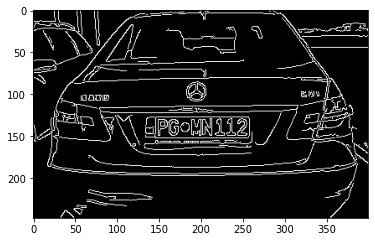

In [223]:
plate_detection()